1.Take an image and apply Fourier Transform on it. Display original, Transformed and inverse transformed image.
2.Perform image smoothing on an image using
Ideal Low pass filter (Use different cut off frequency D0=5, 15, 30, 80 )
Butterworth Low pass filter (same cut off frequency) of Order 2 and Order 4
Gaussian Low pass filter (same cut-off frequency)          
3.Perform image sharpening on an image using
Ideal High pass filter (Use different cut off frequency D0= 15, 30, 80 )
Butterworth High pass filter of order 2 and order 4
Gaussian High pass filter (same cut-off frequency)
Note: 1.  For Q. 2 and 3, Display, input, filtered and Reconstructed image.
         2. You have to show results on two images:
            a. Use your own image 
            b. Use Test image provided in the attachment.

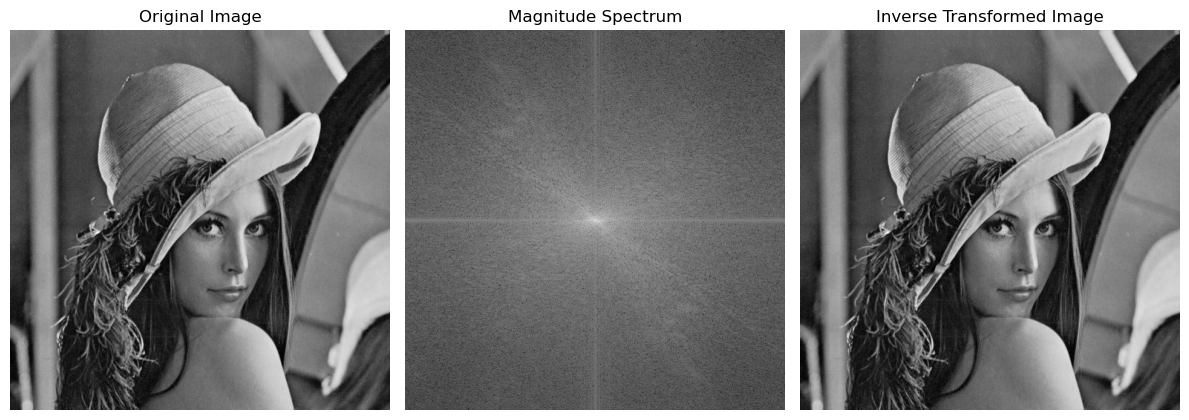

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_fourier_transform(image):
    # Apply Fourier Transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    
    return f, fshift, magnitude_spectrum

def apply_inverse_fourier_transform(fshift):
    # Apply Inverse Fourier Transform
    ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(ishift)
    img_back = np.abs(img_back)
    
    return img_back

# Load the grayscale image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\LennaGrayscale.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f, fshift, magnitude_spectrum = apply_fourier_transform(image)

# Apply Inverse Fourier Transform
img_back = apply_inverse_fourier_transform(fshift)

# Plot original, transformed, and inverse transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Inverse Transformed Image")
plt.imshow(img_back, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


2.Perform image smoothing on an image using
Ideal Low pass filter (Use different cut off frequency D0=5, 15, 30, 80 )
Butterworth Low pass filter (same cut off frequency) of Order 2 and Order 4
Gaussian Low pass filter (same cut-off frequency)          

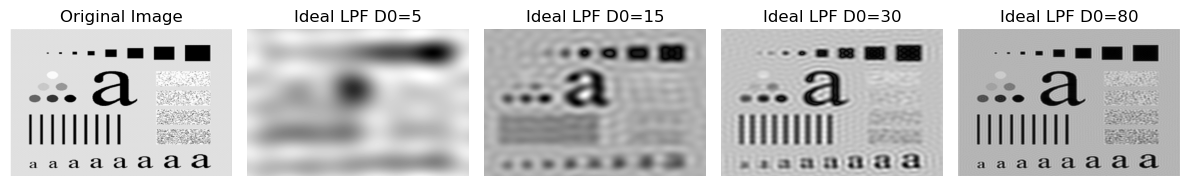

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ideal_low_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if D <= D0:
                mask[u, v] = 1
    return mask

def apply_filter(image, filter_mask):
    fshift = np.fft.fftshift(np.fft.fft2(image))
    filtered_shift = fshift * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_shift))
    filtered_image = np.abs(filtered_image)
    return filtered_image

def plot_results(image, D0_values):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, len(D0_values) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i, D0 in enumerate(D0_values):
        filter_mask = ideal_low_pass_filter(image.shape, D0)
        filtered_image = apply_filter(image, filter_mask)
        plt.subplot(1, len(D0_values) + 1, i + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Ideal LPF D0={D0}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the grayscale image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\test_img.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Cut off frequencies
D0_values = [5, 15, 30, 80]

# Apply and plot Ideal Low Pass Filter
plot_results(image, D0_values)


3.Perform image sharpening on an image using
Ideal High pass filter (Use different cut off frequency D0= 15, 30, 80 )
Butterworth High pass filter of order 2 and order 4
Gaussian High pass filter (same cut-off frequency)

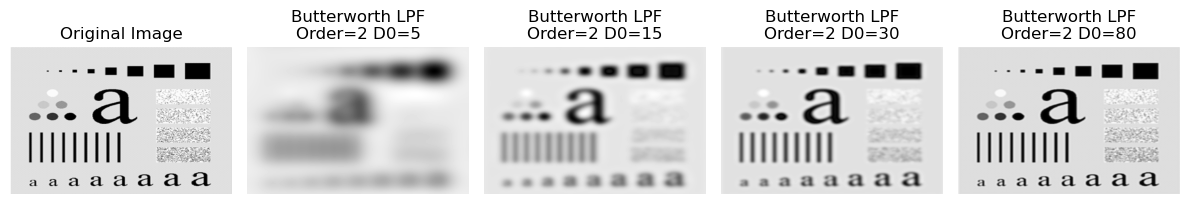

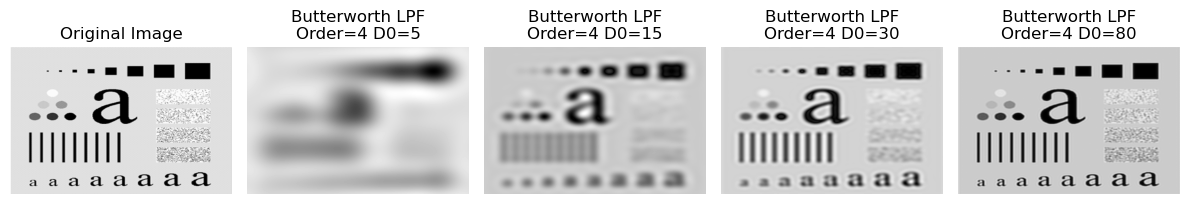

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_low_pass_filter(shape, D0, n):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (D / D0) ** (2 * n))
    return mask

def apply_filter(image, filter_mask):
    fshift = np.fft.fftshift(np.fft.fft2(image))
    filtered_shift = fshift * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_shift))
    filtered_image = np.abs(filtered_image)
    return filtered_image

def plot_results(image, D0_values, order):
    plt.figure(figsize=(12, 8))
    plt.subplot(1, len(D0_values) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i, D0 in enumerate(D0_values):
        filter_mask = butterworth_low_pass_filter(image.shape, D0, order)
        filtered_image = apply_filter(image, filter_mask)
        plt.subplot(1, len(D0_values) + 1, i + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Butterworth LPF\nOrder={order} D0={D0}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the grayscale image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\test_img.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Cut off frequencies
D0_values = [5, 15, 30, 80]

# Apply and plot Butterworth Low Pass Filter (Order 2)
plot_results(image, D0_values, 2)

# Apply and plot Butterworth Low Pass Filter (Order 4)
plot_results(image, D0_values, 4)


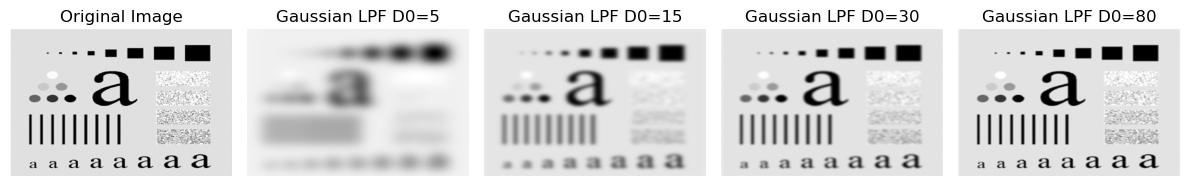

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_low_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = np.exp(-(D ** 2) / (2 * (D0 ** 2)))
    return mask

def apply_filter(image, filter_mask):
    fshift = np.fft.fftshift(np.fft.fft2(image))
    filtered_shift = fshift * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_shift))
    filtered_image = np.abs(filtered_image)
    return filtered_image

def plot_results(image, D0_values):
    plt.figure(figsize=(12, 8))
    plt.subplot(1, len(D0_values) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i, D0 in enumerate(D0_values):
        filter_mask = gaussian_low_pass_filter(image.shape, D0)
        filtered_image = apply_filter(image, filter_mask)
        plt.subplot(1, len(D0_values) + 1, i + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Gaussian LPF D0={D0}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the grayscale image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\test_img.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Cut off frequencies
D0_values = [5, 15, 30, 80]

# Apply and plot Gaussian Low Pass Filter
plot_results(image, D0_values)


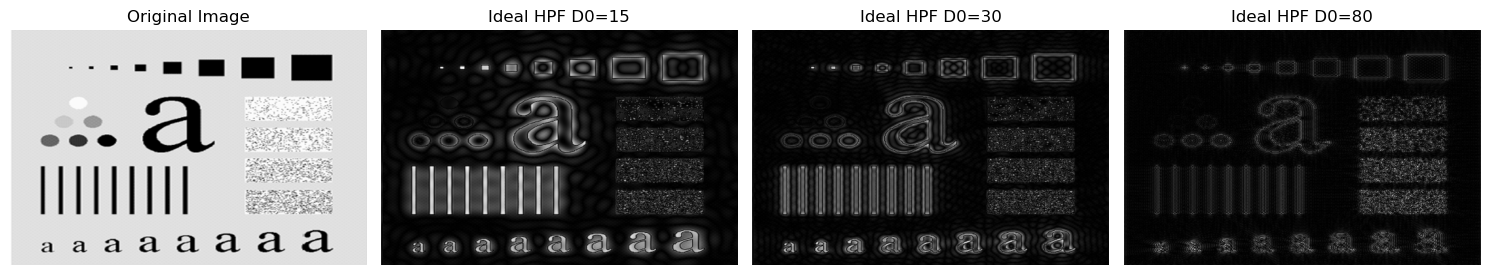

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ideal_high_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if D <= D0:
                mask[u, v] = 0
    return mask

def apply_filter(image, filter_mask):
    fshift = np.fft.fftshift(np.fft.fft2(image))
    filtered_shift = fshift * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_shift))
    filtered_image = np.abs(filtered_image)
    return filtered_image

def plot_results(image, D0_values):
    plt.figure(figsize=(15, 8))
    plt.subplot(1, len(D0_values) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i, D0 in enumerate(D0_values):
        filter_mask = ideal_high_pass_filter(image.shape, D0)
        filtered_image = apply_filter(image, filter_mask)
        plt.subplot(1, len(D0_values) + 1, i + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Ideal HPF D0={D0}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the grayscale image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\test_img.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Cut off frequencies
D0_values = [15, 30, 80]

# Apply and plot Ideal High Pass Filter
plot_results(image, D0_values)


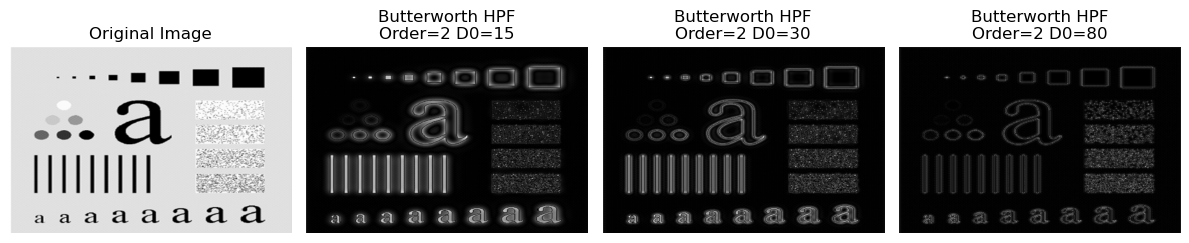

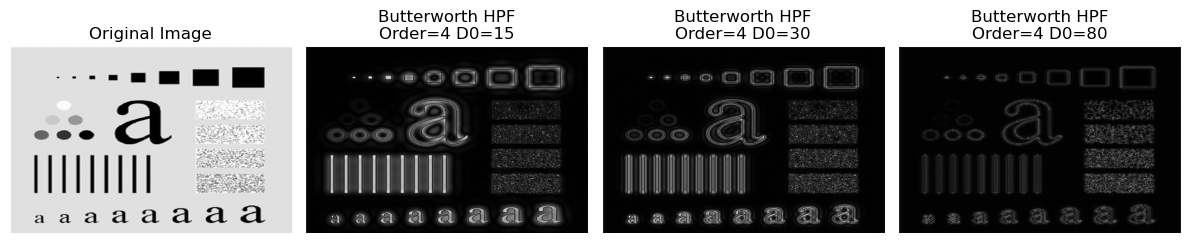

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_high_pass_filter(shape, D0, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if D == 0:
                mask[u, v] = 0
            else:
                mask[u, v] = 1 / (1 + (D0 / D) ** (2 * n))
    return mask

def apply_filter(image, filter_mask):
    fshift = np.fft.fftshift(np.fft.fft2(image))
    filtered_shift = fshift * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_shift))
    filtered_image = np.abs(filtered_image)
    return filtered_image

def plot_results(image, D0_values, order):
    plt.figure(figsize=(12, 8))
    plt.subplot(1, len(D0_values) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i, D0 in enumerate(D0_values):
        filter_mask = butterworth_high_pass_filter(image.shape, D0, order)
        filtered_image = apply_filter(image, filter_mask)
        plt.subplot(1, len(D0_values) + 1, i + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Butterworth HPF\nOrder={order} D0={D0}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the grayscale image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\test_img.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Cut off frequencies
D0_values = [15, 30, 80]

# Apply and plot Butterworth High Pass Filter (Order 2)
plot_results(image, D0_values, 2)

# Apply and plot Butterworth High Pass Filter (Order 4)
plot_results(image, D0_values, 4)


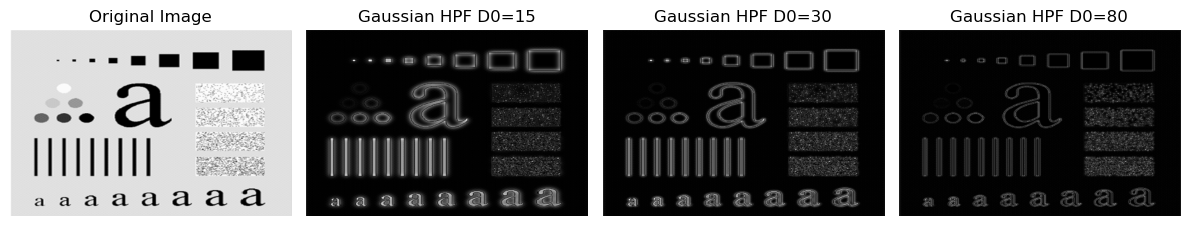

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_high_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 - np.exp(-(D ** 2) / (2 * (D0 ** 2)))
    return mask

def apply_filter(image, filter_mask):
    fshift = np.fft.fftshift(np.fft.fft2(image))
    filtered_shift = fshift * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_shift))
    filtered_image = np.abs(filtered_image)
    return filtered_image

def plot_results(image, D0_values):
    plt.figure(figsize=(12, 8))
    plt.subplot(1, len(D0_values) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i, D0 in enumerate(D0_values):
        filter_mask = gaussian_high_pass_filter(image.shape, D0)
        filtered_image = apply_filter(image, filter_mask)
        plt.subplot(1, len(D0_values) + 1, i + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Gaussian HPF D0={D0}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the grayscale image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\test_img.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Cut off frequencies
D0_values = [15, 30, 80]

# Apply and plot Gaussian High Pass Filter
plot_results(image, D0_values)
